## Step 1 ##

First, the relevant datasat obtained from the WPRDC is displayed

In [1]:
import pandas as pd
%matplotlib inline
import geopandas 

pitt_playground_data = pd.read_csv("pitt_playground_data.csv")

pitt_playground_data.head()

,id,name,equipment_type,manufacturer,safety_surface_type,ada_accessible,street_number,street,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone,latitude,longitude
0,1780722587,Able Long Playground,Play Area 2 to 5,Little Tykes,Pour in Place,f,211.0,Coast Ave,Beechview,4,19,42003192000,5,19,6,4-28,40.408381,-80.028520
1,702514290,North Ave. Playground,Play Area 2 to 5,Playworld,SofSurfaces,f,377.0,W North Ave,Allegheny Center,1,22,42003562700,1,22,1,1-7,40.454526,-80.010188
2,1267038491,Vietnam Veteran's Playground,Slide,Little Tykes,SofSurfaces,f,108.0,Panther Hollow Rd,Squirrel Hill South,5,14,42003980500,3,14,4,2-8,40.434185,-79.944323
3,14898932,Schenley Overlook Playground,Swing 2 Bays,Little Tykes,SofSurfaces,t,NaN,Overlook Dr,Squirrel Hill South,5,14,42003980500,3,14,4,2-8,40.432130,-79.947774
4,204832406,Schenley Overlook Playground,Slide,Little Tykes,SofSurfaces,f,NaN,Overlook Dr,Squirrel Hill South,5,14,42003980500,3,14,4,2-8,40.432215,-79.947817


#### I then manipulate the dataset to display the count of total playground equipment areas within each neighborhood ####

In [3]:
pitt_playground_data['neighborhood'].value_counts()


Squirrel Hill South    32
East Liberty           26
Beechview              21
Allegheny Center       15
South Side Slopes      14
                       ..
Bluff                   2
Lower Lawrenceville     2
Westwood                2
Strip District          1
West Oakland            1
Name: neighborhood, Length: 68, dtype: int64

In [4]:
subset = pitt_playground_data[['neighborhood', 'ada_accessible']]
subset
new_two = pitt_playground_data.sort_values(['ada_accessible'], ascending=False)
new_three=new_two.reset_index(drop=True)
subset

,neighborhood,ada_accessible
id,,
1780722587,Beechview,f
702514290,Allegheny Center,f
1267038491,Squirrel Hill South,f
14898932,Squirrel Hill South,t
204832406,Squirrel Hill South,f
...,...,...
1301777506,Crawford-Roberts,f
1828281616,Crawford-Roberts,f
904290786,East Allegheny,f


## Step 2 ##

Given that we are only concerned with ADA accessibile playground equipment, I then use query masks to further manipulate the data into a dataframe that displays total number of ADA accessibile play areas by neighborhood.

In [22]:
query_mask = pitt_playground_data["ada_accessible"] == "t"

ada_playground = pitt_playground_data[query_mask]

new = ada_playground['neighborhood'].value_counts()

ada_sort = new.reset_index()
ada_sort = ada_sort.rename(columns={'neighborhood' : 'ada_accessible_play_areas'})
ada_sort = ada_sort.rename(columns={'index': 'neighborhood'})

ada_sort




,neighborhood,ada_accessible_play_areas
0,Squirrel Hill South,7
1,East Liberty,4
2,South Side Slopes,4
3,Elliott,4
4,Beechview,4
5,Mount Washington,3
6,Highland Park,3
7,Sheraden,3
8,Carrick,2
9,Manchester,2


## Step 3 ##

Finally, using geopandas I import the Pittsburgh Neighborhood dataset and merge it with the ADA neighborhood summary data.  I then plot a choropleth map to display the number of ADA accessibile p

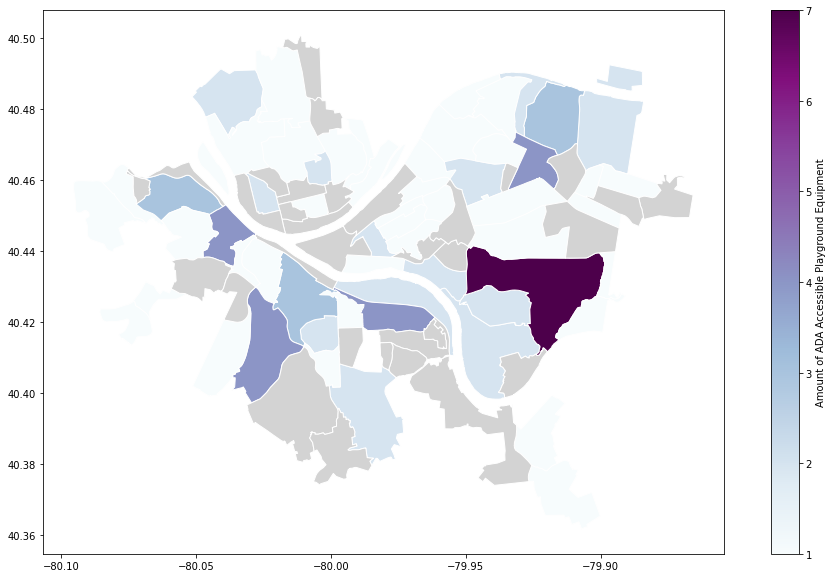

In [23]:
neighborhoods = geopandas.read_file("Neighborhoods/Neighborhoods_.shp")
ada_map = neighborhoods.merge(ada_sort, how='left', left_on='hood', right_on='neighborhood')


ada_map.plot(column='ada_accessible_play_areas', 
               cmap='BuPu', edgecolor="white",legend=True,              
               legend_kwds={'label': "Amount of ADA Accessible Playground Equipment"}, 
               figsize=(17, 10),         
               missing_kwds={"color": "lightgrey"})

## Conclusion ##

Based on the choropleth map, we can very clearly see that Squirrel Hill South is a significant outlier, having 7 ADA equipped play areas. Based on the metric of accessibility to ADA playground equipment, Squirrel Hill is the best neighborhood in Pittsburgh.